https://colab.research.google.com/drive/1rsmz0JrJkfmQRwRu_rVlmz-UkEEGplMg?usp=sharing

# In the name of God

pattern recognition project 2

#Import Libraries
Here import the libraries we will be using in this project

In [1]:
import os
import cv2
import pandas as pd
import seaborn as sns
import matplotlib.patheffects as PathEffects

import numpy as np
import matplotlib.image as mpimg 

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score
from sklearn import decomposition
from sklearn.manifold import TSNE

from keras.preprocessing import image

from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

import seaborn as sn
import matplotlib.pyplot as plt
plt.style.use('seaborn')

!pip install scikit-plot
import scikitplot as skplt

# Step 1 : Prepare Data







### Step 1.1: mount drive
First, mount drive on this notebook. After running the next cell, you can see your google drive directory in Files, the left side of this page.

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
os.chdir('/content/drive/MyDrive/PatternRecognition')

In [4]:
!ls

CatsVsDogs.zip
IUSTPR14001-PRJ2-Ghazaleh_Mahmoudi-400722156.ipynb
kagglecatsanddogs_3367a_2
pattern_recognition_project_1.ipynb


### Step 1.2: unzip dataset (just run first time)

In [5]:
%%capture
# !unzip CatsVsDogs.zip

In [6]:
!ls

CatsVsDogs.zip
IUSTPR14001-PRJ2-Ghazaleh_Mahmoudi-400722156.ipynb
kagglecatsanddogs_3367a_2
pattern_recognition_project_1.ipynb


## Step 1.3: set hyperparameters
please define and set hyperparameters.

In [7]:
IMG_WIDTH, IMG_HEIGHT = 224, 224
IMG_CHANNEL = 3
EPOCHS = 4
BATCH_SIZE= 16
n_classes = 2

In [28]:
DATA_CAT = 'kagglecatsanddogs_3367a_2/PetImages/Cat'
DATA_DOG = 'kagglecatsanddogs_3367a_2/PetImages/Dog'

## Step 1.4: read image path and label binarize




In [9]:
labels = {'cat' : 0, 'dog':1}

In [10]:
img_paths = [os.path.join(DATA_CAT, f'{i}.jpg') for i in range(0, 1500, 1)]
img_labels = [labels['cat'] for i in range(0, 1500, 1)]

In [11]:
img_paths += [os.path.join(DATA_DOG, f'{i}.jpg') for i in range(0, 1500, 1)]
img_labels += [labels['dog'] for i in range(0, 1500, 1)]

## Step1.4: an example from dataset

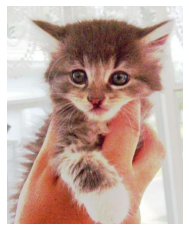

In [12]:
image_sample = mpimg.imread(os.path.join(DATA_CAT, '100.jpg'))
plt.imshow(image_sample)
plt.axis('off')
plt.show()

# Step 2 : Choose Resnet50 for feature extraction

# Step 3 : Extract Feature

Extract Feature using Resnet50 with imagenet pretrain weights.

Executing this part of the code on the CPU was very time consuming.

In this part, image features are extracted by using the remaining layer to the end of the Resnet network.



In [13]:
def feature_axtraction_resnet50(img_paths):
    resnet_model = ResNet50(weights='imagenet', include_top=False)
    n_img = len(img_paths)
    img_array = np.zeros((n_img, IMG_WIDTH, IMG_HEIGHT, IMG_CHANNEL))

    print("image array shape : ", np.shape(img_array))

    for i, path in enumerate(img_paths):
        try:
            img = image.load_img(path, target_size=(IMG_WIDTH, IMG_HEIGHT))
            img = image.img_to_array(img)
            img = np.expand_dims(img, axis=0)
            x = preprocess_input(img)
            img_array[i] = x
        except:
            print(path)

    features = resnet_model.predict(img_array, batch_size=BATCH_SIZE, verbose=1)
    features = features.squeeze()

    print("feature shape : ", np.shape(features))
    features = features.reshape((n_img, np.shape(features)[1]*np.shape(features)[2]*np.shape(features)[3]))

    return features

# Step 4 : Dimention Reduction

## First option: PCA 10

In [ ]:
def pca_dimension_reduction(x_train, n_component=10):
    #Make an instance of the Model
    pca = decomposition.PCA(n_component)
    
    #Apply the mapping (transform) to both the training set and the test set.
    x_train = pca.fit_transform(x_train) 

    return  x_train

## Second option: t-SNE

In [18]:
def t_sne_dimention_reduction(x_train, n_component=2):
    t_sne = TSNE(n_components=n_component, random_state=0)
    x_train = t_sne.fit_transform(x_train)

    return x_train

# Experiment (run feature extraction)

In [ ]:
def confusion_matrix_(test_labels, predicted_labels):
    print("\nconfusion_matrix\n")
    cm = confusion_matrix(test_labels, predicted_labels)
    plt.subplots(figsize=(10, 6))
    sn.heatmap(cm, annot = True, fmt = 'd', cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

In [ ]:
def roc_curve_acu(test_labels, predicted_labels, classifier):
    fpr, tpr, thres = roc_curve(test_labels, predicted_labels)
    print('AUC: {:.3f}'.format(roc_auc_score(test_labels, predicted_labels)))

    # roc curve
    plt.plot(fpr, tpr, "b", label=classifier)
    plt.plot([0,1],[0,1], "k--", label='Random Guess')
    plt.xlabel("false positive rate")
    plt.ylabel("true positive rate")
    plt.legend(loc="best")
    plt.title("ROC curve")
    plt.show()

In [ ]:
all_features = feature_axtraction_resnet50(img_paths)
print("Extract feature successfully with shape : ", np.shape(all_features))

94781440/94765736 [==============================] - 1s 0us/step
image array shape :  (3000, 224, 224, 3)
188/188 [==============================] - 457s 2s/step
feature shape :  (3000, 7, 7, 2048)
Extract feature successfully with shape :  (3000, 100352)


In [ ]:
legend_label=[]
for i in img_labels:
    if i == 0:
        legend_label.append('red')
    else:
        legend_label.append('blue')

### t-sne 2

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
No handles with labels found to put in legend.


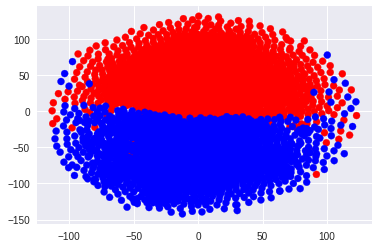

In [ ]:
t_sne = t_sne_dimention_reduction(all_features, 2)
tsne_results=pd.DataFrame(t_sne, columns=['dim_1', 'dim_2'])
plt.scatter(tsne_results['dim_1'], tsne_results['dim_2'], c=legend_label)
plt.legend(loc = "best")
plt.show()

### t-sne 3

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


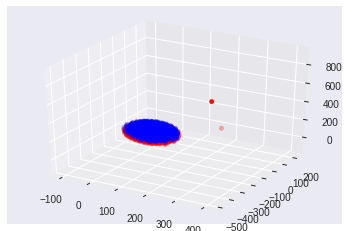

In [ ]:
t_sne = t_sne_dimention_reduction(all_features, 3)
tsne_results=pd.DataFrame(t_sne, columns=['dim_1', 'dim_2', 'dim_3'])
ax = plt.axes(projection ="3d")
ax.scatter3D(tsne_results['dim_1'], tsne_results['dim_2'], tsne_results['dim_3'],  c=legend_label)
plt.show()

## t-sne with 300 image for better presentation

In [30]:
img_paths_150 = [os.path.join(DATA_CAT, f'{i}.jpg') for i in range(0, 150, 1)]
img_labels_150 = [labels['cat'] for i in range(0, 150, 1)]
img_paths_150 += [os.path.join(DATA_DOG, f'{i}.jpg') for i in range(0, 150, 1)]
img_labels_150 += [labels['dog'] for i in range(0, 150, 1)]
all_features_150 = feature_axtraction_resnet50(img_paths_150)

image array shape :  (300, 224, 224, 3)
19/19 [==============================] - 48s 2s/step
feature shape :  (300, 7, 7, 2048)


In [31]:
legend_label_150=[]
for i in img_labels_150:
    if i == 0:
        legend_label_150.append('red')
    else:
        legend_label_150.append('blue')

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


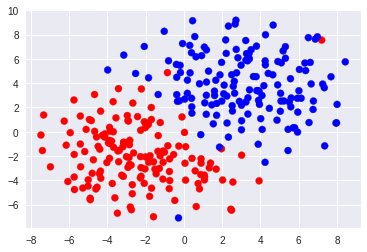

In [32]:
t_sne = t_sne_dimention_reduction(all_features_150, 2)
tsne_results=pd.DataFrame(t_sne, columns=['dim_1', 'dim_2'])
plt.scatter(tsne_results['dim_1'], tsne_results['dim_2'], c=legend_label_150)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


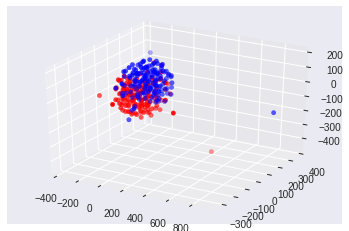

In [33]:
t_sne_150 = t_sne_dimention_reduction(all_features_150, 3)
tsne_results=pd.DataFrame(t_sne_150, columns=['dim_1', 'dim_2', 'dim_3'])
ax = plt.axes(projection ="3d")
ax.scatter3D(tsne_results['dim_1'], tsne_results['dim_2'], tsne_results['dim_3'],  c=legend_label_150)
plt.show()

# Step 5 : Adaboost

The results of Adabost network, despite its simple structure, have a very good performance and reach over 95% accuracy.

The higher the number of input features, the more accurate it is. The accuracy of pca 10 is higher than t-sne.


Also, the neural network generally gets the same results as PCA 10, but the accuracy is slightly higher.

In [ ]:
class AdaBoostClassifier:
    
    def __init__(self, n_estimators=50):
        self.n_estimators = n_estimators
        self.models = []
        
    def fit(self,X,y):
        
        w = np.array([1/len(y) for i in y])
        
        for m in range(self.n_estimators):
            
            week_classifier_DT = DecisionTreeClassifier(max_depth = 1)     
            week_classifier_DT.fit(X, y, sample_weight = w)
            y_pred = week_classifier_DT.predict(X)
            
            incorrect = y_pred != y
            
            factors = np.ones(len(y))
            for i, index_ in enumerate(incorrect):
                if i == False:
                    factors[index_] = -1
            
            model_error = np.average(incorrect, weights=w, axis=0)
            
            alpha = np.log((1-model_error)/model_error)/2
            
            z_t = 2*(model_error*(1-model_error))
            
            w *= np.exp(alpha*factors)/z_t
            
            self.models.append((alpha, week_classifier_DT))
    
    def predict(self,X):
        
        sum_y = []
        for alpha, h in self.models:
            y_new = []
            for h_x in h.predict(X): 
                v = np.ones(n_classes)*(-1/(n_classes-1))
                v[h_x] = 1
                y_new.append(v)
            sum_y.append(np.array(y_new))
        
        y_pred = sum(sum_y)
        
        return (np.argmax(y_pred, axis=1))

## Run with adaboost and PCA(10) dimentiom reduction

In [ ]:
def adaboost_pca_experiment(all_features, img_labels):
    PCA_features = pca_dimension_reduction(all_features)
    print("Extract PCA feature successfully with shape : ", np.shape(PCA_features))
    img_train, img_test, label_train, label_test = train_test_split(PCA_features, img_labels, test_size=0.2, shuffle=True, random_state=42)

    adaboost = AdaBoostClassifier()
    adaboost.fit(img_train, label_train)

    print('AdaBoost PCA train accuracies : ', accuracy_score(label_train, adaboost.predict(img_train)))

    y_pred = adaboost.predict(img_test)

    print('AdaBoost PCA test accuracies : ', accuracy_score(label_test, y_pred))
    roc_curve_acu(label_test, y_pred, 'AdaBoost with PCA 10')
    
    print(classification_report(label_test, y_pred))

    confusion_matrix_(label_test, y_pred)



Extract PCA feature successfully with shape :  (3000, 10)
AdaBoost train accuracies :  0.96375
AdaBoost test accuracies :  0.95
AUC: 0.953


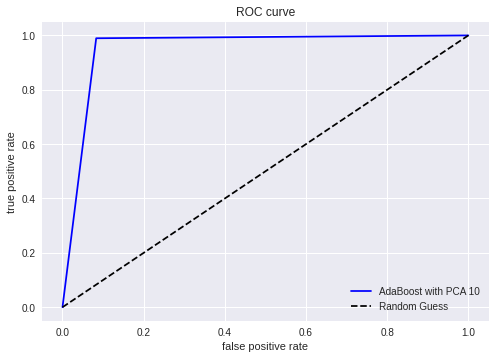

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       313
           1       0.91      0.99      0.95       287

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600


confusion_matrix



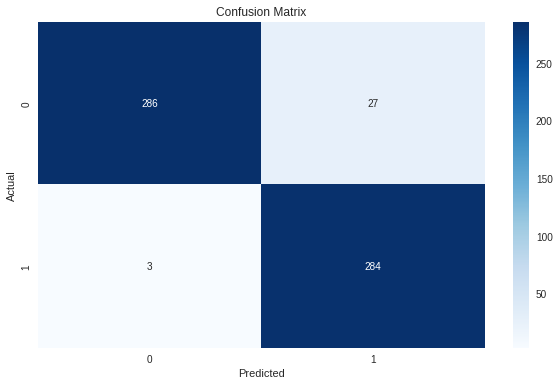

In [ ]:
adaboost_pca_experiment(all_features, img_labels)

## Run with adaboost t-SNE dimentiom reduction

In [ ]:
def adaboost_t_sne_experiment(all_features, img_labels):
    t_sne_features = t_sne_dimention_reduction(all_features)
    print("Extract t-sne feature successfully with shape : ", np.shape(t_sne_features))
    img_train, img_test, label_train, label_test = train_test_split(t_sne_features, img_labels, test_size=0.2, shuffle=True, random_state=42)

    adaboost = AdaBoostClassifier()
    adaboost.fit(img_train, label_train)

    print('AdaBoost with t_sne train accuracies : ', accuracy_score(label_train, adaboost.predict(img_train)))

    y_pred = adaboost.predict(img_test)

    print('AdaBoost with t_sne test accuracies : ', accuracy_score(label_test, y_pred))
    
    roc_curve_acu(label_test, y_pred, 'AdaBoost with t_sne')
    print(classification_report(label_test, y_pred))

    confusion_matrix_(label_test, y_pred)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Extract t-sne feature successfully with shape :  (3000, 2)
AdaBoost train accuracies :  0.865
AdaBoost test accuracies :  0.8516666666666667
AUC: 0.953


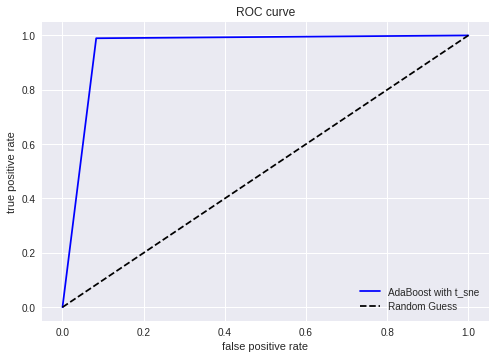

              precision    recall  f1-score   support

           0       0.79      0.98      0.87       313
           1       0.98      0.71      0.82       287

    accuracy                           0.85       600
   macro avg       0.88      0.85      0.85       600
weighted avg       0.88      0.85      0.85       600


confusion_matrix



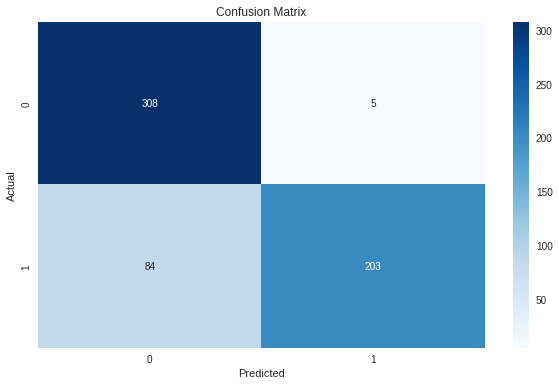

In [ ]:
adaboost_t_sne_experiment(all_features, img_labels)

# Step 6 : Fully Connected Network

In general, using all the image features has many advantages and better results are obtained. 

If we connect the features extracted from the Resnet as the input of the neural network and add a classifier on it, then the classification operation will work well for us.

Due to the use of all features and neural network structure, the accuracy of this part has reached 99%.

In [ ]:
def dense_model(img_train, img_test, label_train, label_test):
    model = Sequential()

    model.add(Dense(128, activation='relu', input_shape=(7*7*2048,)))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation = 'sigmoid'))

    model.summary()

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(img_train, label_train,
            batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1,
            validation_data=(img_train, label_train))
    
    y_pred = model.predict(img_test)
    return history, y_pred


In [ ]:
def plot(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [ ]:
def fully_connected_model_experiment(all_features, img_labels_binarize):
    print(np.shape(all_features))
    img_train, img_test, label_train, label_test = train_test_split(all_features, img_labels_binarize, test_size=0.2, shuffle=True, random_state=42)
    history, y_pred = dense_model(img_train, img_test, label_train, label_test)
    plot(history)

    roc_curve_acu(label_test, y_pred, 'Fully Connected with all feature')
    

## Experimrnt result for Run with Fully Connected Network

(3000, 100352)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               12845184  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 12,853,505
Trainable params: 12,853,505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
150/150 [==============================] - 12s 76ms/step - loss: 1.0020 - accuracy: 0.9542 - val_loss: 0.1385 - val_accuracy: 0.9867
Epoch 2/4
150/150 

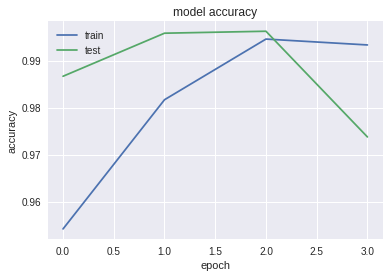

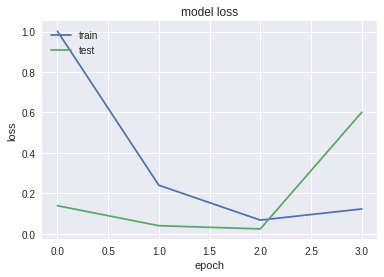

AUC: 0.966


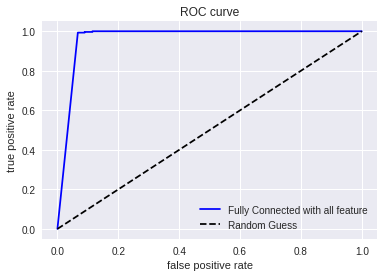

In [ ]:
img_labels_binarize = label_binarize(img_labels, classes=[0, 1])
fully_connected_model_experiment(all_features, img_labels_binarize)

# Run time

adaboost (tsne) < adaboost (pca) < fully connected network

# Accuracy

adaboost (tsne) < adaboost (pca) < fully connected network